<a href="https://colab.research.google.com/github/sugimotoh/seminar2018/blob/master/COVID19_FK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **新型感染症オープンデータ（福岡県）の解析**　

Googleアカウントにログインして実行すれば更新されます。

#  **1. Scraping オープンデータからの読み込み**

In [34]:
import pandas as pd
COVID01 = pd.read_csv('https://ckan.open-governmentdata.org/dataset/412b1e1c-7c05-443e-8c1f-e8dfcff57b91/resource/bd25a096-b060-428a-bc85-91c1715fc540/download/400009_pref_fukuoka_covid19_newlycases.csv')
COVID02 = pd.read_csv('https://ckan.open-governmentdata.org/dataset/ef64c68a-d89e-4b1b-a53f-d2535ebfa3a1/resource/33e3a2ba-6d07-474c-9370-2885932b22e9/download/400009_pref_fukuoka_covid19_exam.csv')

In [35]:
COVIDok01 = pd.read_csv('http://www.okayama-opendata.jp/ckan/dataset/e6b3c1d2-2f1f-4735-b36e-e45d36d94761/resource/0c728c2e-a366-421d-95df-86b6b5ad15fd/download/kansenshasuu.csv', encoding='shift_jis')
COVIDok02 = pd.read_csv('http://www.okayama-opendata.jp/ckan/dataset/e6b3c1d2-2f1f-4735-b36e-e45d36d94761/resource/b10fffae-6e6e-4516-9865-124470eec364/download/pcrkensaninzuuruikei.csv', encoding='shift_jis')
COVIDok03 = pd.read_csv('http://www.okayama-opendata.jp/ckan/dataset/e6b3c1d2-2f1f-4735-b36e-e45d36d94761/resource/60ecd874-0f71-4d9f-9a8a-936fad9c99bc/download/pcr.csv', encoding='shift_jis')

# **2-1. データ前処理** 　変数名修正、変数選択、欠損値を0処理

In [36]:
#OKAYAMA prefecture
COVID_ok01=COVIDok01.rename(columns={'集計時点_年月日': '公表年月日','日別の感染者数': '新規陽性数'})
COVID_ok01_filter=COVID_ok01[['都道府県名', '公表年月日', '曜日', '新規陽性数']]
COVID_ok01_filter_fillNA =  COVID_ok01_filter.fillna(0)
#Fukuoka prefecture
COVID_02=COVID02.rename(columns={'年月日': '公表年月日','累計': '検査累計','件数': '検査件数'})
COVID_02_filter=COVID_02[['福岡市', '北九州市', '福岡県', '民間検査', '検査件数', '検査累計', '公表年月日']]
COVID_02_filter_fillNA =  COVID_02_filter.fillna(0)

COVID_02_filter_fillNA

,福岡市,北九州市,福岡県,民間検査,検査件数,検査累計,公表年月日
0,1.0,0.0,0,0,1,1,2020/01/28
1,0.0,0.0,0,0,0,1,2020/01/29
2,2.0,2.0,0,0,4,5,2020/01/30
3,0.0,0.0,1,0,1,6,2020/01/31
4,1.0,0.0,0,0,1,7,2020/02/01
...,...,...,...,...,...,...,...
576,444.0,347.0,900,5736,7427,1069066,2021/08/26
577,362.0,39.0,987,5142,6530,1075596,2021/08/27
578,479.0,184.0,930,4890,6483,1082079,2021/08/28
579,412.0,42.0,1370,3868,5692,1087771,2021/08/29


# **2-2. データ前処理**　2つのテーブル（データ）を日付で結合

※新規陽性率は0.1で10％

In [37]:
COVID19FK = pd.merge(COVID01, COVID_02_filter_fillNA, on='公表年月日',how='inner')
COVID19FK['新規陽性率'] =COVID19FK['新規陽性数'] /COVID19FK['検査件数']
COVID19FK_filter=COVID19FK[['都道府県名', '公表年月日', '曜日', '新規陽性数', '検査件数', '新規陽性率']]
COVID19FK_filter

,都道府県名,公表年月日,曜日,新規陽性数,検査件数,新規陽性率
0,福岡県,2020/01/28,火,0,1,0.000000
1,福岡県,2020/01/29,水,0,0,NaN
2,福岡県,2020/01/30,木,0,4,0.000000
3,福岡県,2020/01/31,金,0,1,0.000000
4,福岡県,2020/02/01,土,0,1,0.000000
...,...,...,...,...,...,...
576,福岡県,2021/08/26,木,991,7427,0.133432
577,福岡県,2021/08/27,金,996,6530,0.152527
578,福岡県,2021/08/28,土,953,6483,0.147000
579,福岡県,2021/08/29,日,957,5692,0.168131


# **2-3. データダウンロード**　ここで使われているデータはダウンロードできます。プログラムを実行して下さい。

In [ ]:
from google.colab import files
filename =  "COVID19_FUKUOKA.csv"
COVID19FK_filter.to_csv(filename, encoding = 'utf-8-sig') 
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **3-1.　新規陽性者数プロット**　※数値は当日に公表されたもの

福岡県

In [43]:
# グラフの描画
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates["draft"] = go.layout.Template(
    layout_annotations=[
        dict(
            name="draft watermark",
            text="DRAFT",
            textangle=-30,
            opacity=0.1,
            font=dict(color="black", size=100),
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.5,
            showarrow=False,
        )
    ]
)
pio.templates.default = "plotly_white+draft"
fig = px.bar(data_frame=COVID19FK.reset_index(), x='公表年月日', y='新規陽性数',color_discrete_sequence=['indianred'])
fig.update_layout(title='福岡県新規陽性者数')
fig.show()

In [44]:
# グラフの描画
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates["draft"] = go.layout.Template(
    layout_annotations=[
        dict(
            name="draft watermark",
            text="DRAFT",
            textangle=-30,
            opacity=0.1,
            font=dict(color="black", size=100),
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.5,
            showarrow=False,
        )
    ]
)
pio.templates.default = "plotly_white+draft"
fig = px.bar(data_frame=COVID_ok01_filter_fillNA.reset_index(), x='公表年月日', y='新規陽性数',color_discrete_sequence=['indianred'])
fig.update_layout(title='岡山県新規陽性者数')
fig.show()

# **3-2.　福岡県内の新規陽性率プロット**　

新規陽性率＝新規陽性者数/検査件数　※数値は当日に公表されたもの

In [45]:
# グラフの描画
pio.templates["draft"] = go.layout.Template(
    layout_annotations=[
        dict(
            name="draft watermark",
            text="DRAFT",
            textangle=-30,
            opacity=0.1,
            font=dict(color="black", size=100),
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.5,
            showarrow=False,
        )
    ]
)
pio.templates.default = "plotly_white+draft"
fig3 = px.line(data_frame=COVID19FK.reset_index(), x='公表年月日', y='新規陽性率')
fig3.update_layout(title='新規陽性率')
fig3.show()


In [46]:
fig2 = px.bar(data_frame=COVID19FK.reset_index(), x='公表年月日', y='検査件数',color_discrete_sequence=['indianred'])
fig2.update_layout(title='検査件数')
fig2.show()

# 4　状態空間モデルによる新規感染者数の予測

In [47]:
# read libraries
import numpy as np
import seaborn as sns
from scipy import stats
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

# graph
from matplotlib import pylab as plt
#import seaborn as sns
%matplotlib inline
sns.set()

# edit graph
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# statistical model
import statsmodels.api as sm

In [92]:
import pandas as pd
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
COVID01t = pd.read_csv('https://ckan.open-governmentdata.org/dataset/412b1e1c-7c05-443e-8c1f-e8dfcff57b91/resource/bd25a096-b060-428a-bc85-91c1715fc540/download/400009_pref_fukuoka_covid19_newlycases.csv',index_col='公表年月日',parse_dates=True)
COVID02t = pd.read_csv('https://ckan.open-governmentdata.org/dataset/ef64c68a-d89e-4b1b-a53f-d2535ebfa3a1/resource/33e3a2ba-6d07-474c-9370-2885932b22e9/download/400009_pref_fukuoka_covid19_exam.csv',index_col='年月日',parse_dates=True)
COVID01t.head()

,No.,全国地方公共団体コード,都道府県名,曜日,新規陽性数,累計
公表年月日,,,,,,
2020-01-28,1,400009,福岡県,火,0,0
2020-01-29,2,400009,福岡県,水,0,0
2020-01-30,3,400009,福岡県,木,0,0
2020-01-31,4,400009,福岡県,金,0,0
2020-02-01,5,400009,福岡県,土,0,0


In [93]:
COVIDok01t = pd.read_csv('http://www.okayama-opendata.jp/ckan/dataset/e6b3c1d2-2f1f-4735-b36e-e45d36d94761/resource/0c728c2e-a366-421d-95df-86b6b5ad15fd/download/kansenshasuu.csv', encoding='shift_jis',index_col='集計時点_年月日',parse_dates=True)
COVIDok02t=COVIDok01t['日別の感染者数'].fillna(0)
COVIDok02t

集計時点_年月日
2020-03-22      1.0
2020-03-23      0.0
2020-03-24      0.0
2020-03-25      0.0
2020-03-26      0.0
              ...  
2021-08-27    248.0
2021-08-28    210.0
2021-08-29    188.0
2021-08-30    151.0
2021-08-31    139.0
Name: 日別の感染者数, Length: 528, dtype: float64

In [94]:
COVID_02t=COVID02t.rename(columns={'累計': '検査累計','件数': '検査件数'})
COVID_02t_filter=COVID_02t[['福岡市', '北九州市', '福岡県', '民間検査', '検査件数', '検査累計']]
#COVID_02t_filter_fillNA =  COVID_02t_filter.fillna(0)
COVID_01t_filter=COVID01t['新規陽性数']
ts = COVID_01t_filter
ts

公表年月日
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
             ... 
2021-08-26    991
2021-08-27    996
2021-08-28    953
2021-08-29    957
2021-08-30    626
Name: 新規陽性数, Length: 581, dtype: int64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/structural.py:413: SpecificationWarning:

Value of `trend` may be overridden when the trend component is specified using a model string.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/structural.py:413: SpecificationWarning:

Value of `stochastic_level` may be overridden when the trend component is specified using a model string.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/structural.py:413: SpecificationWarning:

Value of `stochastic_trend` may be overridden when the trend component is specified using a model string.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/structural.py:413: SpecificationWarning:

Value of `trend` may be overridden when the trend component is specified using a model 

                           Unobserved Components Results                            
Dep. Variable:                        新規陽性数   No. Observations:                  581
Model:                  deterministic trend   Log Likelihood               -2999.267
                   + stochastic seasonal(7)   AIC                           6008.533
                                    + cycle   BIC                           6030.270
                                    + AR(1)   HQIC                          6017.014
Date:                      Tue, 31 Aug 2021                                         
Time:                              11:26:49                                         
Sample:                          01-28-2020                                         
                               - 08-30-2021                                         
Covariance Type:                        opg                                         
                       coef    std err          z      P>|z|     

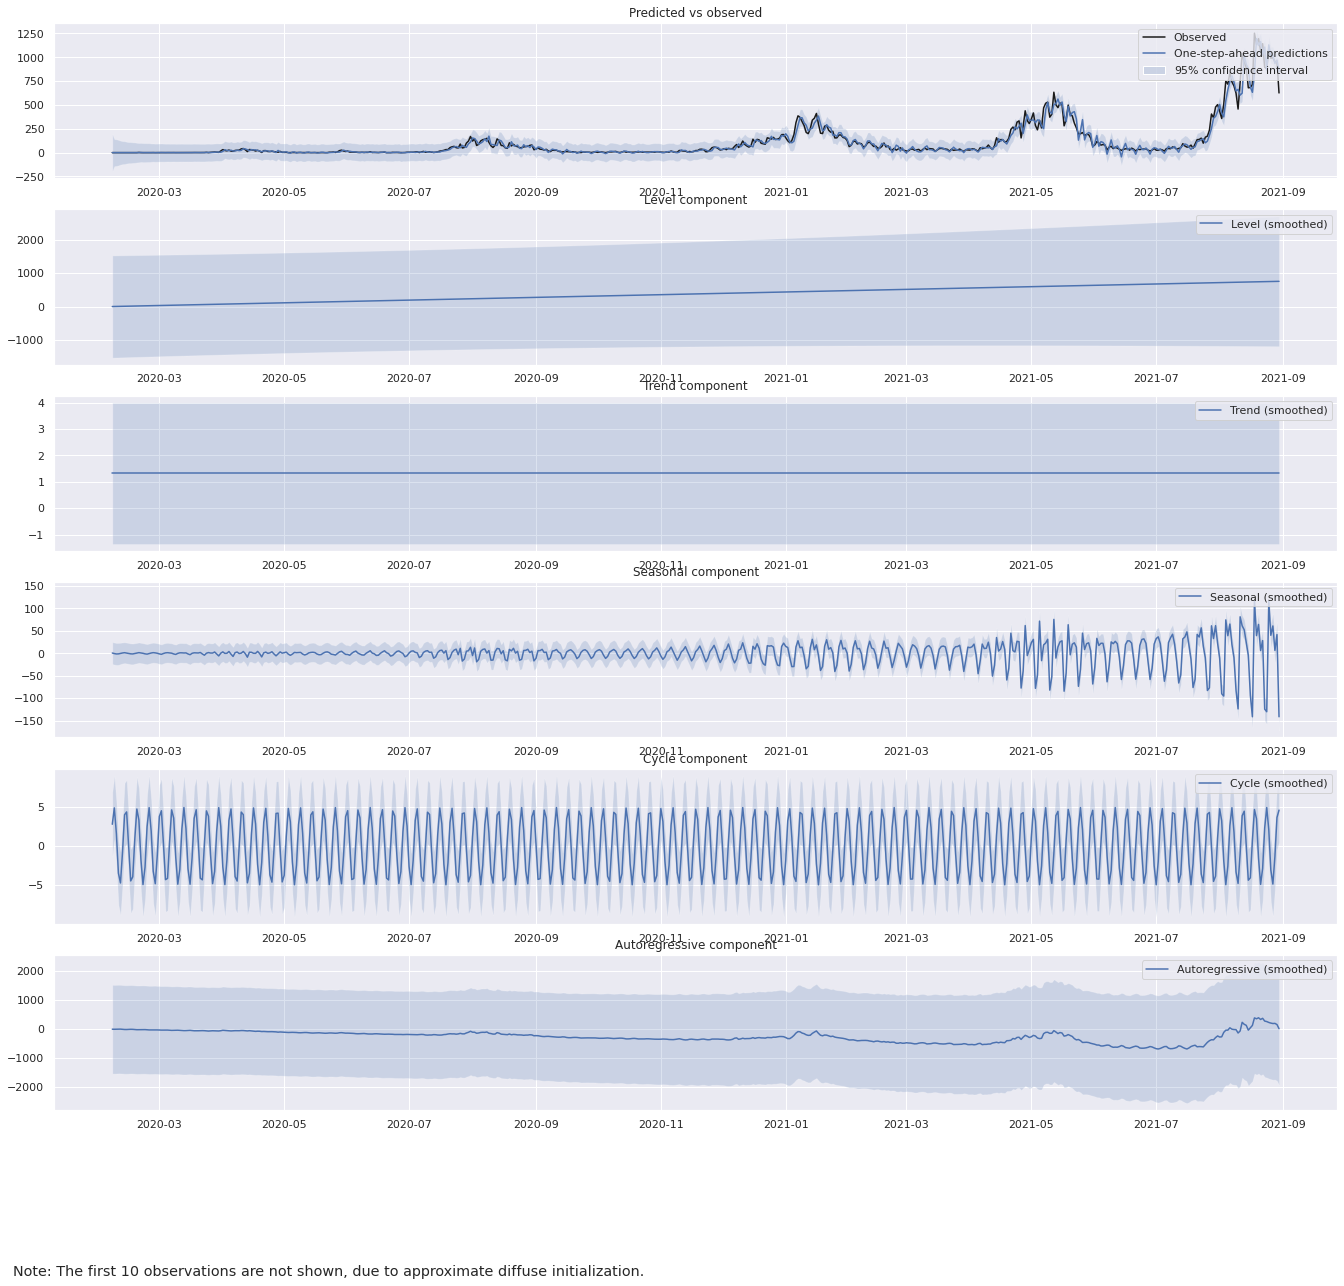

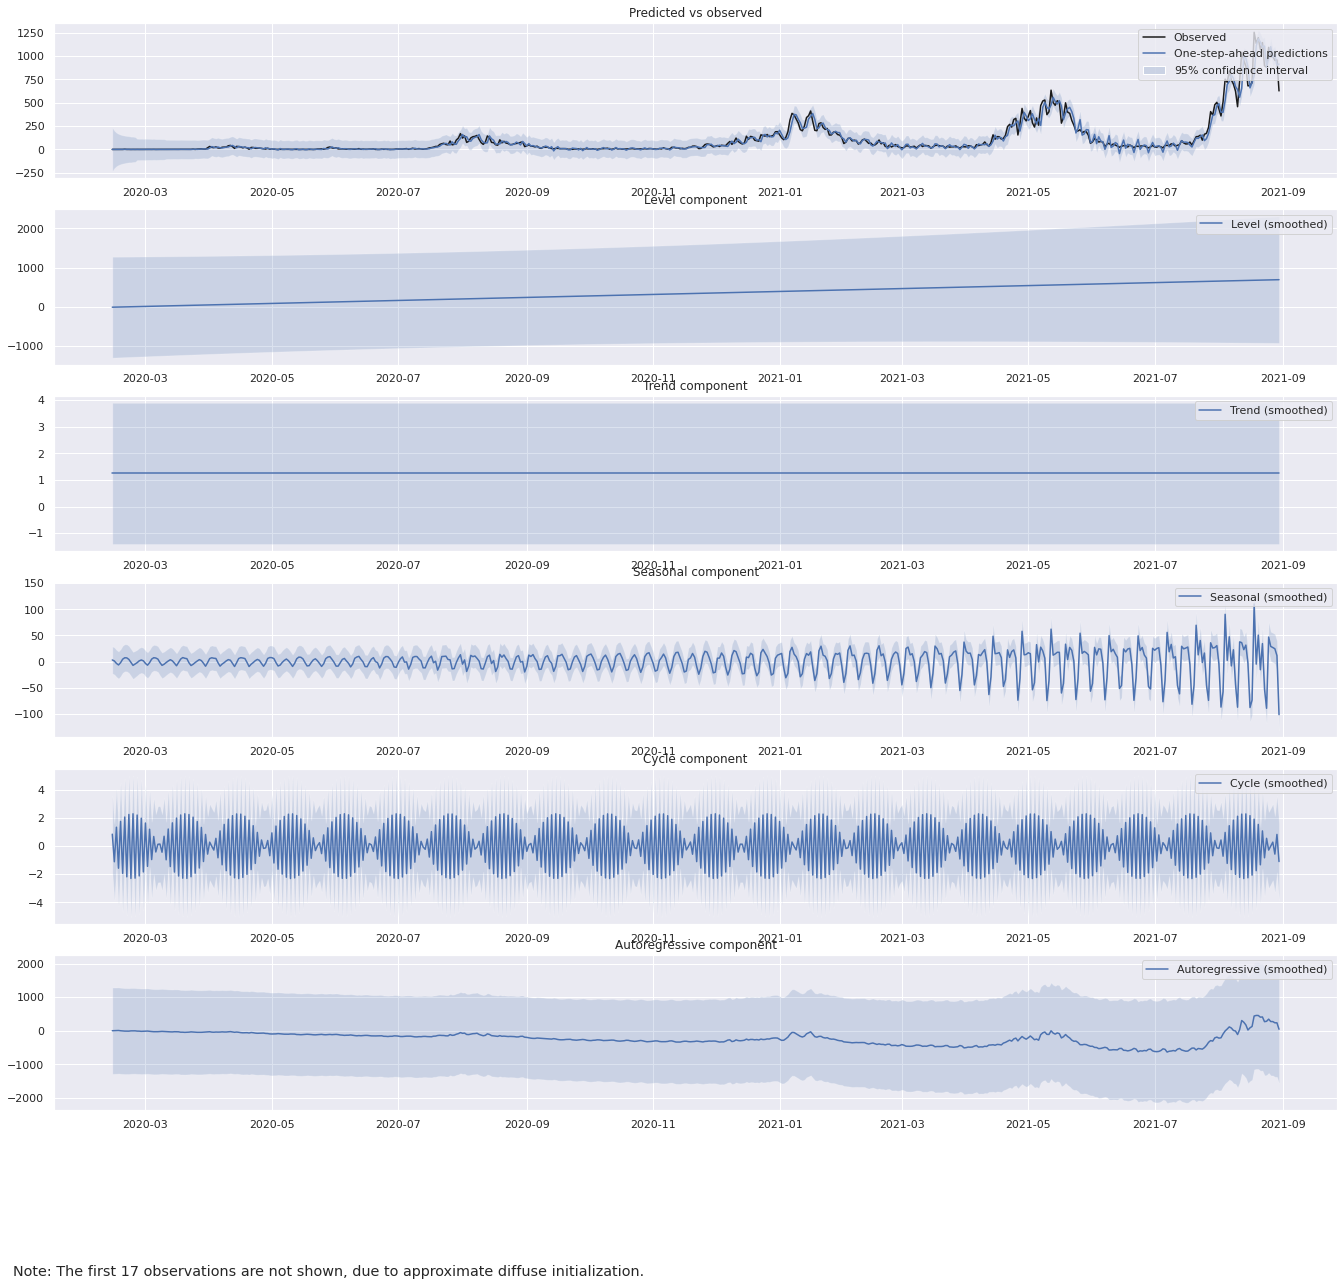

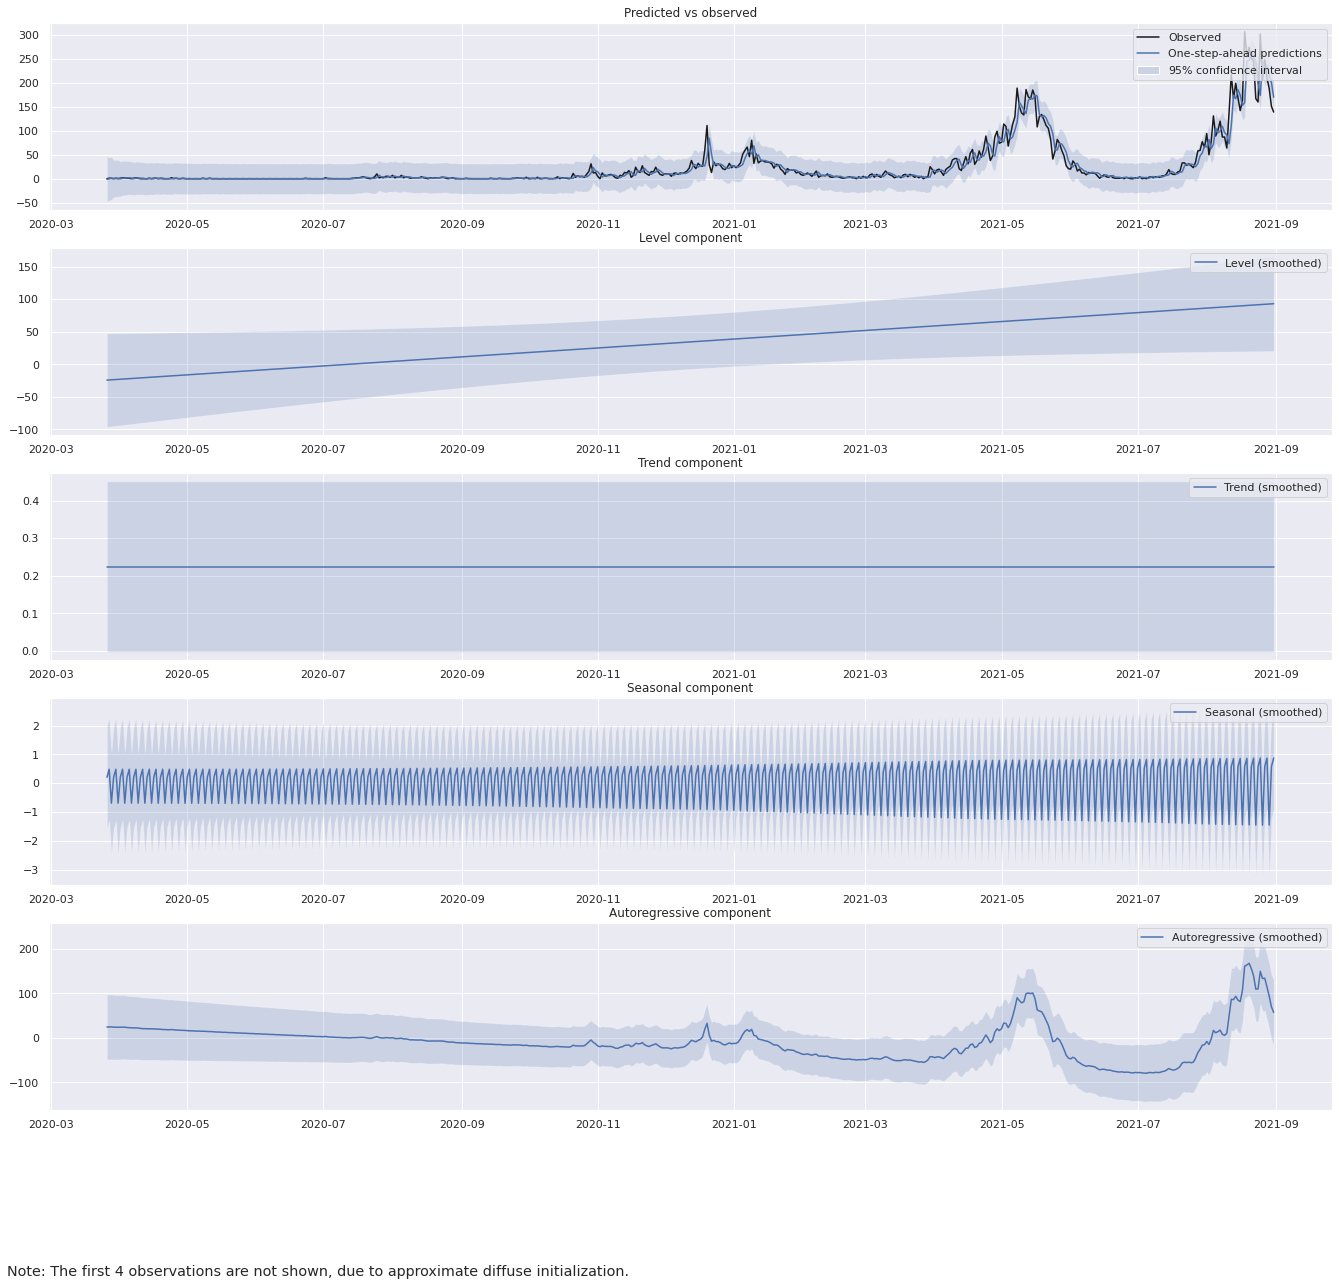

In [154]:
mod_07_03_season_local_trend_cycle = sm.tsa.UnobservedComponents(ts, 
                                               level='dtrend',        trend=True,             seasonal=7,                irregular=False,     cycle=True,
                                               stochastic_level=True, stochastic_trend=True, stochastic_seasonal=True,   autoregressive=1, stochastic_cycle=False)
# damped_cycle=True)
# cycle_period_bounds = (1.5*12, 12*12))
mod_07_98_season_local_trend_cycle = sm.tsa.UnobservedComponents(ts, 
                                               level='dtrend',        trend=True,             seasonal=14,                irregular=False,     cycle=True,
                                               stochastic_level=True, stochastic_trend=True, stochastic_seasonal=True,   autoregressive=1, stochastic_cycle=False) 
# damped_cycle=True)
mod_ok_03_season_local_trend_cycle = sm.tsa.UnobservedComponents(COVIDok02t, 
                                               level='dtrend',        trend=True,             seasonal=3,                irregular=False,     cycle=False,
                                               stochastic_level=True, stochastic_trend=True, stochastic_seasonal=True,   autoregressive=1, stochastic_cycle=False, 
                                               damped_cycle=True)
res_07_03_season_local_trend_cycle = mod_07_03_season_local_trend_cycle.fit(start_params=mod_07_03_season_local_trend_cycle.fit().params)
res_07_98_season_local_trend_cycle = mod_07_98_season_local_trend_cycle.fit(start_params=mod_07_98_season_local_trend_cycle.fit().params)
res_ok_03_season_local_trend_cycle = mod_ok_03_season_local_trend_cycle.fit(start_params=mod_ok_03_season_local_trend_cycle.fit().params)
print(res_07_03_season_local_trend_cycle.summary()) 
print(res_07_98_season_local_trend_cycle.summary()) 
print(res_ok_03_season_local_trend_cycle.summary()) 
rcParams['figure.figsize'] = 23, 20
fig_d = res_07_03_season_local_trend_cycle.plot_components()
fig_e = res_07_98_season_local_trend_cycle.plot_components()
fig_o = res_ok_03_season_local_trend_cycle.plot_components()

# reference

**statsmodels.tsa.statespace.structural.UnobservedComponents**
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html

In [153]:
# predict
pred_03 = res_07_03_season_local_trend_cycle.predict('2020-01-29', '2021-09-15')
pred_98 = res_07_98_season_local_trend_cycle.predict('2020-01-29', '2021-09-15')
pred_ok = res_ok_03_season_local_trend_cycle.predict('2020-03-22', '2021-09-15')
# predict and actual data
#rcParams['figure.figsize'] = 23, 8
#plt.plot(ts)
#plt.plot(pred_StateSpace, "r")

# prediction '2021-08-20'
fig3 = go.Figure()
fig3.add_trace(go.Scatter(y=pred_03, name="prediction", mode="lines"))
fig3.add_trace(go.Scatter(y=ts, name="actual", mode="lines")) 
fig3.show()

fig4 = go.Figure()
fig4.add_trace(go.Scatter(y=pred_98, name="prediction", mode="lines"))
fig4.add_trace(go.Scatter(y=ts, name="actual", mode="lines")) 
fig4.show()

fig5 = go.Figure()
fig5.add_trace(go.Scatter(y=pred_ok, name="prediction", mode="lines"))
fig5.add_trace(go.Scatter(y=COVIDok02t, name="actual", mode="lines")) 
fig5.show()

**Root Mean Square Error**

In [150]:
ts_=ts[11:]
pred03_=pred_03[10:580]
pred98_=pred_98[10:580]
pred_ok_=pred_ok[0:528]
pred_ok_

2020-03-22      0.000000
2020-03-23      0.001263
2020-03-24      0.499941
2020-03-25      0.498998
2020-03-26     -0.999921
                 ...    
2021-08-27    222.453113
2021-08-28    236.415757
2021-08-29    216.446260
2021-08-30    200.219645
2021-08-31    170.000572
Freq: D, Length: 528, dtype: float64

In [151]:
import numpy as np
from sklearn import metrics

score03_ = metrics.mean_squared_error(pred03_,ts_)
score98_ = metrics.mean_squared_error(pred98_,ts_)
score_ok01_ = metrics.mean_squared_error(pred_ok_,COVIDok02t)
# Measure MSE error.  
print("Final score (MSE of short cycle model): {}".format(score03_))
print("Final score (MSE of short cycle model): {}".format(score98_))
print("Final score (RMSE of short cycle model): {}".format(score_ok01_))

# Measure RMSE error.  RMSE is common for regression.
score03 = np.sqrt(metrics.mean_squared_error(pred03_,ts_))
score98 = np.sqrt(metrics.mean_squared_error(pred98_,ts_))
score_ok01 = np.sqrt(metrics.mean_squared_error(pred_ok_,COVIDok02t))
print("Final score (RMSE of short cycle model): {}".format(score03))
print("Final score (RMSE of short cycle model): {}".format(score98))
print("Final score (RMSE of short cycle model): {}".format(score_ok01))

Final score (MSE of short cycle model): 2081.6732081546625
Final score (MSE of short cycle model): 2287.659510861199
Final score (RMSE of short cycle model): 250.70613874779028
Final score (RMSE of short cycle model): 45.62535707427025
Final score (RMSE of short cycle model): 47.82948369845946
Final score (RMSE of short cycle model): 15.83370262281663
